${\bf Exercice 1}$

In [3]:
import numpy as np

def f(x):
    return (np.sin(x))**2 / x

a = 1
b = 3
h = (b - a) / 5
x = np.linspace(a, b, 6)

Pour la méthode de Gauss: 
$$ \int_1^3 f(x)dx=\int_{-1}^1 f(2+t)dt\sim\frac{5}{9}f\left(2-\frac{\sqrt{15}}{5}\right)+\frac{8}{9}f\left(2\right)+\frac{5}{9}f\left(2+\frac{\sqrt{15}}{5}\right)
$$

In [4]:
Ifd = h * np.sum(f(x[1:]))
Ifg = h * np.sum(f(x[:-1]))
Iftrap = h / 2 * np.sum(f(x[:-1]) + f(x[1:]))
Ifsimpson = h / 6 * np.sum(f(x[:-1]) + f(x[1:]) + 4 * f((x[:-1] + x[1:]) / 2))

Igauss = 5 / 9 * f(2 - np.sqrt(15) / 5) + 8 / 9 * f(2) + 5 / 9 * f(2 + np.sqrt(15) / 5)

print("Méthode des rectangles à droite (Ifd) :", Ifd)
print("Méthode des rectangles à gauche (Ifg) :", Ifg)
print("Méthode du trapèze (Iftrap) :", Iftrap)
print("Méthode de Simpson (Ifsimpson) :", Ifsimpson)
print("Quadrature de Gauss (Igauss) :", Igauss)

Méthode des rectangles à droite (Ifd) : 0.6505983594549893
Méthode des rectangles à gauche (Ifg) : 0.9311724125411088
Méthode du trapèze (Iftrap) : 0.790885385998049
Méthode de Simpson (Ifsimpson) : 0.7948215209163263
Quadrature de Gauss (Igauss) : 0.7946526708765818


${\bf Exercice 2}$


In [5]:
import numpy as np

def IMC(f, a, b):# f est la fonction, a est la borne inferieure et b le borne superieur
    n=10000
    x = a + (b - a) * np.random.rand(n, 1)
    imc = (b - a) * np.mean(f(x))
    return imc

In [6]:
def f1(x):
    r1=57.9*10**6
    r2=56.7*10**6
    return np.sqrt((r1)**2 *np.sin(x)**2 + (r2)**2 * np.cos(x)**2)

In [7]:
from math import *
    
print ("IMC = ", IMC(f1, 0, 2*pi))

IMC =  359988173.7260871


Il s'agit de l'orbite de Mercure.

Pour obtenir la méthode des rectangles, on peut ajouter:

In [8]:
n=10000
a=0
b= 2*pi
x2 = np.linspace(a, b, n+1)
Irect = h * np.sum(f1(x2[:-1]))  # Somme de l'aire des rectangles à gauche
    
print ("IRECT = ", Irect)

IRECT =  229206282765.56906



${\bf Exercice 3}$


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return (1 + x**2) * x**(-3/4)

def f2(x):
    return 4 * (1 + x**8)

ModuleNotFoundError: No module named 'matplotlib'

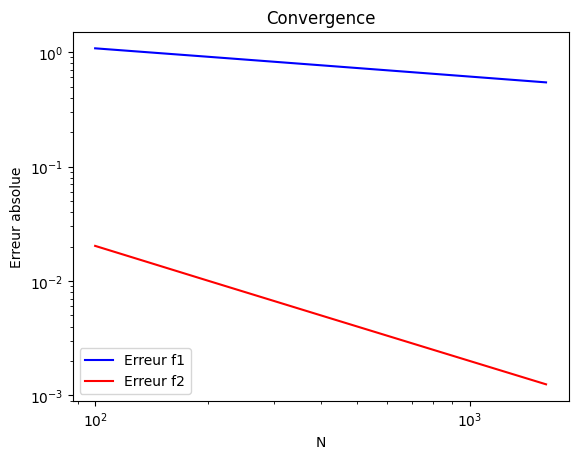

Pente pour f1 : -0.2471556418517599
Pente pour f2 : -1.0042994892704546


In [ ]:
N = np.array([100, 200, 400, 800, 1600])
h= np.zeros(len(N))
E1 = np.zeros(len(N))
E2 = np.zeros(len(N))

for i in range(len(N)):
    h[i] = 1 / N[i]
    x = np.linspace(0, 1, N[i] + 1)
    If1 = h[i] * np.sum(f1(x[1:]))
    If2 = h[i] * np.sum(f2(x[1:]))
    E1[i] = np.abs(If1 - 40 / 9)
    E2[i] = np.abs(If2 - 40 / 9)

plt.loglog(N, E1, 'b', label='Erreur f1')
plt.loglog(N, E2, 'r', label='Erreur f2')

p1 = np.polyfit(np.log(N), np.log(E1), 1)
p2 = np.polyfit(np.log(N), np.log(E2), 1)
pente1 = p1[0]
pente2 = p2[0]

plt.legend()
plt.xlabel('N')
plt.ylabel('Erreur absolue')
plt.title('Convergence')
plt.show()

print('Pente pour f1 :', pente1)
print('Pente pour f2 :', pente2)


La convergence est beaucoup plus lente dans le premier cas. On retrouve une convergence
d'ordre 1 après changement de variable, ce qui est normal car la fonction à intégrer est de
classe C1.